# Modelo de Média Móvel

## 1.0 Bibliotecas

In [26]:
import yfinance          as yf
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

## 2.0 Calculando a Média Móvel para 20 períodos

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

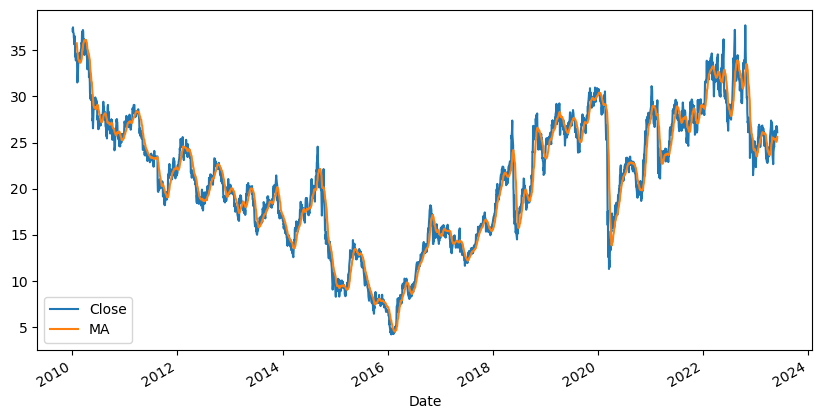

In [27]:
# Baixe os dados históricos da ação PETR4
petr4 = yf.download('PETR4.SA', start='2010-01-01')

# Crie uma coluna com a média móvel dos preços de fechamento da ação PETR4
petr4['MA'] = petr4['Close'].rolling(window=20).mean()

# Plote um gráfico com os preços de fechamento e a média móvel
petr4[['Close', 'MA']].plot(figsize=(10, 5))

## 3.0 Calculando a Média Móvel para 50 e 200 períodos e sinalizar Buy or Sell

### 3.1 Adquirindo os dados

In [28]:
# Crie duas colunas com as médias móveis dos preços de fechamento da ação PETR4 para os períodos de 200 e 50 dias
petr4['SMA200'] = petr4['Close'].rolling(window=200).mean()
petr4['SMA50'] = petr4['Close'].rolling(window=50).mean()

### 3.2 Criando a Sinalização de Buy or Sell

In [29]:
# Crie uma coluna com o sinal de compra ou venda baseado no cruzamento das médias móveis
petr4['Signal'] = 0
petr4['Signal'][50:] = np.where(petr4['SMA50'][50:] > petr4['SMA200'][50:], 1.0, 0.0)
petr4['Signal'][50:] = np.where(petr4['SMA50'][50:] < petr4['SMA200'][50:], -1.0, petr4['Signal'][50:])

C:\Users\d311r.DESKTOP-O2NL7MH\AppData\Local\Temp\ipykernel_19020\3337699292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr4['Signal'][50:] = np.where(petr4['SMA50'][50:] > petr4['SMA200'][50:], 1.0, 0.0)
C:\Users\d311r.DESKTOP-O2NL7MH\AppData\Local\Temp\ipykernel_19020\3337699292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr4['Signal'][50:] = np.where(petr4['SMA50'][50:] < petr4['SMA200'][50:], -1.0, petr4['Signal'][50:])


### 3.3 Realizando o backtest

In [30]:
# Faça o backtest da estratégia desde 2015
petr4['Position'] = petr4['Signal'].diff()
petr4['Returns']  = petr4['Close'].pct_change() * petr4['Position'].shift(1)
petr4['Cumulative_Returns'] = (1 + petr4['Returns']).cumprod() - 1

### 3.4 Plotando o gráfico

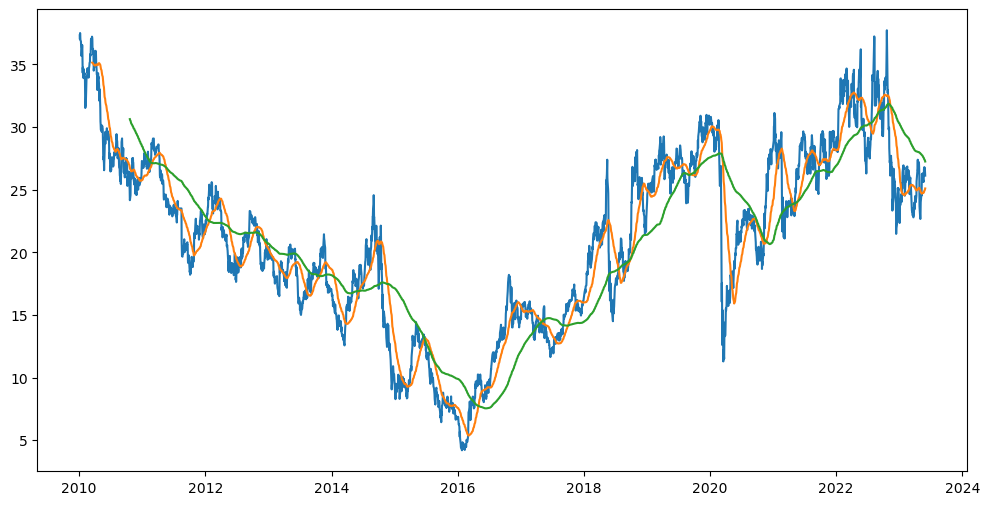

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(petr4['Close'], label = 'Petr4')
plt.plot(petr4['SMA50'], label = 'SMA50')
plt.plot(petr4['SMA200'], label = 'SMA200')

### 3.5 Plot das posições de compra e venda

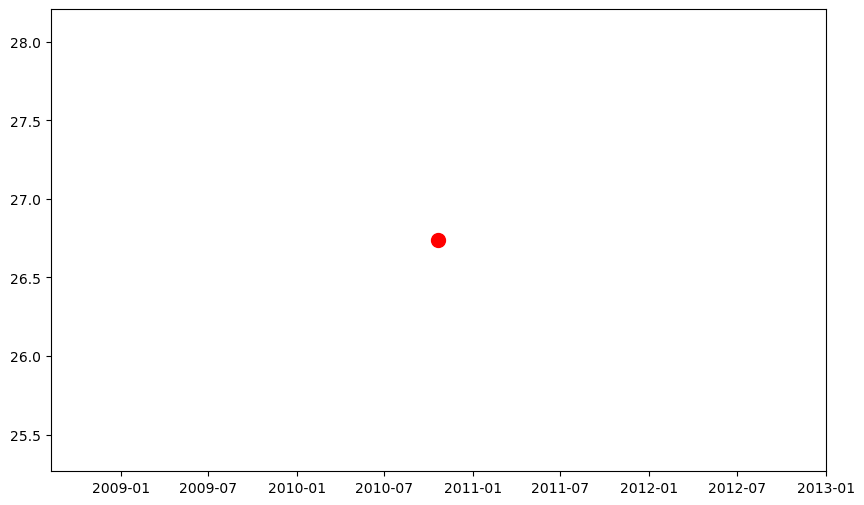

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(petr4.loc[petr4['Position'] == 1].index,
         petr4['SMA50'][petr4['Position'] == 1],
         '^', markersize = 10, color = 'green', label = 'Compra')
plt.plot(petr4.loc[petr4['Position'] == -1].index,
         petr4['SMA50'][petr4['Position'] == -1],
         'o', markersize = 10, color = 'red', label = 'Venda')